<a href="https://colab.research.google.com/github/mk688/IntravascularBrachytherapy/blob/master/VisualizeDose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)
import pandas.util.testing as tm

In [ ]:
# Run it only once to mount the google drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Upload output.txt file which contains the scored dose
# Make sure you use a unique file name especially when you upload an updated file. 
# It saves all files - doesn't overwrite it.

from google.colab import files
uploaded = files.upload()

print(uploaded)

In [13]:
# Read output file from the EGSnrc program "Summary of region dosimetry per particle"
# Save the output file as "output.txt"

dicRow = {}
DoseTable = []

objFile = open('output07172020.txt','r')
for row in objFile:
  lstRow = row.split()
  dicRow = {"ir": int(lstRow[0]), "Dose Scored": float(lstRow[8])}
  DoseTable.append(dicRow)
objFile.close()


In [ ]:
# Get user input for the location of the corresponding ir in order (from top to bottom in the output file)
Location = []
for each in DoseTable:
  EachLocation = float(input("Enter the location in mm for each ir "))
  Location.append(EachLocation)

normIndex = Location.index(2)


In [30]:
# Normalize the dose such that Dose @ 2mm = 100%
normDose = DoseTable[normIndex]['Dose Scored']

normDoseTable = []
for each in DoseTable:
  normDoseEach = (each['Dose Scored']/normDose)*100
  normDoseTable.append(normDoseEach)

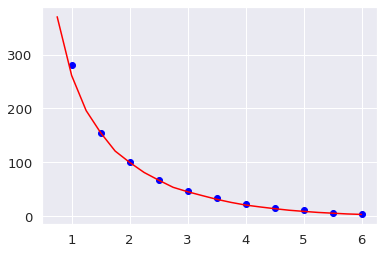

In [53]:
# Plot normDoseTable (y-axis) vs. Location (x-axis)
indices = [i for i in range(len(normDoseTable)) if normDoseTable[i]>400] 
LocationPlot = list(Location)
normDoseTablePlot = list(normDoseTable)
if indices:
  for each in indices:
    del LocationPlot[each]
    del normDoseTablePlot[each]
    indices[:] = [number-1 for number in indices]  

# Published PDD for Sr-90
xaxis = np.linspace(0.75, 6.0, 22, endpoint = True, retstep = False, dtype = None, axis =0 )
yaxis = [370, 261, 196, 155, 121, 100, 81.3, 67.1, 53.8, 45.6, 38.5, 31.6, 25.8, 20.9, 17.4, 14.2, 11.3, 9.2, 7.22, 5.83, 4.42, 3.54]

plt.plot(LocationPlot, normDoseTablePlot, 'o', color='blue')
plt.plot(xaxis, yaxis, color='red')
plt.show()
